In [2]:
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import data

with open(os.path.join('../cache', 'train_test_base.pkl'), 'rb') as f:    
    df = pickle.load(f)        
    df = df.reset_index(drop=True)
        
ips = df['ip'].values

#df, ips, click_times = data.load()

In [4]:
click_times = df['click_time'].values

In [5]:
import numpy as np

def datetime_to_deltas(series, delta=np.timedelta64(1, 's')):
    t0 = series.min()
    return ((series-t0)/delta).astype(np.int32)

df['t'] = datetime_to_deltas(click_times)
#df['t_minutes'] = df['t'].floordiv(60)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242441395 entries, 0 to 242441394
Data columns (total 10 columns):
app              uint16
channel          uint16
click_time       datetime64[ns]
device           uint16
ip               uint32
is_attributed    uint8
os               uint16
hour             uint8
day              uint8
t                int32
dtypes: datetime64[ns](1), int32(1), uint16(4), uint32(1), uint8(3)
memory usage: 6.1 GB


In [63]:

df_12 = df.iloc[:data.TRAIN_ROWS]
df_12 = df_12[df_12.app==3]

# how many different IPs per second
x_app_12 = df_12[['ip', 't']].groupby(['t'])[['ip']].count().reset_index().rename(index=str, columns={'t': 't_delta'})

# set 0's across all time steps
x = np.zeros((df_12['t'].max()+1,), dtype=np.uint16)

# set counts where different than 0
x[x_app_12.t_delta.values.ravel()] = x_app_12.ip.values


x_app_12t = df_12[df_12.is_attributed==1][['ip', 't']].groupby(['t'])[['ip']].count().reset_index().rename(index=str, columns={'t': 't_delta'})

# initialize with all zeros for all time steps
xt = np.zeros((df_12['t'].max()+1,), dtype=np.uint16)

# set counts 
xt[x_app_12t.t_delta.values.ravel()] = x_app_12t.ip.values

In [62]:
x[5250:5260]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41], dtype=uint16)

In [15]:
#x = df[['ip', 't']].groupby(['t'])[['ip']].count().reset_index()

In [21]:
with open("../cache/cps_ip.pkl", "rb") as f:
    u = pickle.load(f)



In [54]:
df['u'] = u

In [56]:
df[df.app==12].head(20)

,app,channel,click_time,device,ip,is_attributed,os,hour,day,t,u
490,12,245,2017-11-06 16:00:00,1,156391,0,19,16,6,5259,283
498,12,265,2017-11-06 16:00:00,1,67708,0,11,16,6,5259,283
504,12,326,2017-11-06 16:00:00,1,73516,0,16,16,6,5259,283
519,12,245,2017-11-06 16:00:00,1,62129,0,13,16,6,5259,283
529,12,245,2017-11-06 16:00:00,1,49057,0,8,16,6,5259,283
554,12,245,2017-11-06 16:00:00,1,194881,0,4,16,6,5259,283
561,12,245,2017-11-06 16:00:00,1,20488,0,19,16,6,5259,283
576,12,140,2017-11-06 16:00:00,1,95509,0,20,16,6,5259,283
585,12,259,2017-11-06 16:00:00,1,101941,0,9,16,6,5259,283
589,12,178,2017-11-06 16:00:00,1,48646,0,19,16,6,5259,283


In [32]:
x1 = df[df.app==12]
x1.shape
#sns.distplot(u[(df.is_attributed==1)&(df.app==12)])
#sns.distplot(u[(df.is_attributed==0)&(df.app==12)])

(31202352, 10)

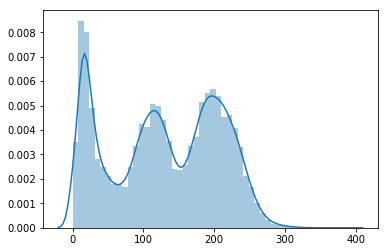

In [64]:
sns.distplot(x)

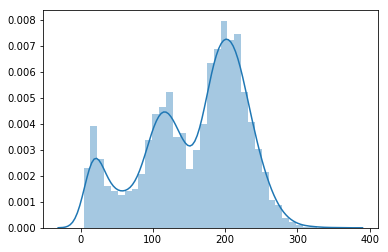

In [65]:

sns.distplot(x[xt==1])


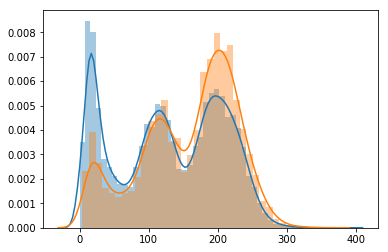

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x)
sns.distplot(x[xt==1])


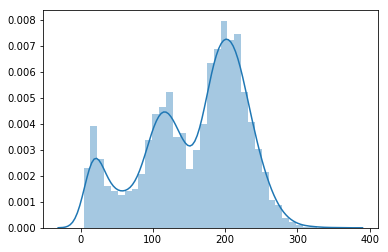

In [67]:
sns.distplot(x[xt==1])

In [ ]:
sns.distplot(x)
sns.distplot(xt)
